# MACHINE LEARNING AN END TO END SOLUTION:  Section 2
## Loan Application

Presented by Shaun

Throughout the financial sector, machine learning algorithms are being developed to approve loan applications. In this project,we will process a dataset and use techniques to construct three machine learning models to predict on loan approvals. A dataset with 1102 observations will be examined, cleaned and organised; a data exploration will identify the features and their data types and the most important features, which are the best predictors for loan approvals. 


### Hyperparameter Tuning

This section will discuss tuning the machine learning models to improve their accuracy scores and performance; the hyperparameters, are those parameters of the models that can be tuned. It is generally recognised that a crucial step in machine learning is hyperparameter tuning. Typically, hyperparameters are tuned by ‘what has worked before’, in this project we will use the grid search cross validation method. The grid search cross validation method is included with Scikit-learn, which offers an ‘exhaustive search over specified parameter values for an estimator’ 



In [97]:
import numpy as np
import pandas as pd


##import classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

##import train test split
from sklearn.model_selection import train_test_split

##import scoring metrics
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score,roc_curve, auc
from sklearn import model_selection
from sklearn.model_selection import cross_val_score  

##import Visualisations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [98]:
predata = pd.read_csv('c:\\ml\\LoanPredOrig.csv')
predata = predata.dropna()
#Categorical data clean up, this will error if you try to run this twice consecutively, without reloading the dataset
predata['Loan_Status'] = predata.Loan_Status.astype(int)
predata['Employed'] = np.where(predata['Employed'].str.contains('YES'), 1, 0)
predata['Marital_Status'] = np.where(predata['Marital_Status'].str.contains('YES'), 1, 0)
predata['Graduate'] = np.where(predata['Graduate'].str.contains('YES'), 1, 0)
predata['Credit_History'] = np.where(predata['Credit_History'].str.contains('YES'), 1, 0)
predata['PropertyOwner'] = np.where(predata['PropertyOwner'].str.contains('YES'), 1, 0)
df = pd.DataFrame(predata)

#Drop the Loanid column
del df['Loanid']

#One hot encding on the Gender column
data = pd.get_dummies(df,columns=['Gender'])

In [99]:
#print(data.describe())  # examine the distribution of data including, count, mean, std=standard deviation, can only do numerical data
print(data.info())  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1100
Data columns (total 13 columns):
Marital_Status       1100 non-null int32
Dependents           1100 non-null int64
Graduate             1100 non-null int32
Employed             1100 non-null int32
ApplicantIncome      1100 non-null float64
CoapplicantIncome    1100 non-null float64
LoanAmount           1100 non-null int64
Loan_Amount_Term     1100 non-null int64
Credit_History       1100 non-null int32
PropertyOwner        1100 non-null int32
Loan_Status          1100 non-null int32
Gender_Female        1100 non-null uint8
Gender_Male          1100 non-null uint8
dtypes: float64(2), int32(6), int64(3), uint8(2)
memory usage: 79.5 KB
None


### Assigning the Dataset

Previously we split the data into a training dataset and a test dataset. 
The statement below loads the entire dataset data to X_train and the labels y to y_train.

In [100]:
X_train, y_train = (data.loc[:, data.columns != 'Loan_Status'], data['Loan_Status'])


In [101]:
print("Shape of the X_train dataset: ", X_train.shape)
print("Shape of the y_train dataset: ", y_train.shape)
print('----------------------------------------------')
print("Training Dataset, counts of y label '1': {}".format(sum(y_train==1)))
print("Training Dataset, counts of y label '0': {}".format(sum(y_train==0)))

Shape of the X_train dataset:  (1100, 12)
Shape of the y_train dataset:  (1100,)
----------------------------------------------
Training Dataset, counts of y label '1': 743
Training Dataset, counts of y label '0': 357


## KNN Hyperparameter Tuning 

*We will start by looking at the optimal parameter value k for the KNN model.In our previous KNN model run, k had run with its default value of 5. To identify its optimal value, we will import the grid search cross validation **GridSearchCV** and the  **StratifiedKFold** Cross-Validation; this will sort all the data and divide this into k folds, the folds are made by ensuring the percentage of samples for each class are evenly distributed.  A general recommendation is to set k to 5 or 10, we will set it to 10.*

In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

### KNeighborsClassifier() value of k

We will set the range of k values from 1-31 and the model will evaluate each value of k against the full dataset which will be divided into 10 folds (9 training 1 for evaluation), with an even distribution of the class in each fold. 

In [117]:
knn = KNeighborsClassifier()
k = list(range(1, 31))
print(k)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


### GridSearchCV parameters

**The GridSearchCV parameters:**
1. *estimator : estimator object.*
2. *param_grid : dict or list of dictionaries  Dictionary with parameters names (string) as keys and lists of parameter settings to try as values, or a list of such dictionaries.*
3. *cv : int, cross-validation generator.Determines the cross-validation splitting strategy. This is using the kfold=StratifiedKFold(n_splits=10)*
4. *scoring we are scoring on accuray.*
5. *return_train_score : boolean, optional,  If False, the cv_results_ attribute will not include training scores.computing the scores on the training set can be computationally expensive and is not strictly required to select the parameters that yield the best generalization performance.*
6. *n_jobs : int (default=None) Number of jobs to run in parallel. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.*

More details here:  __[GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)__

In [118]:
param_grid = dict(n_neighbors=k)
print(param_grid)
kfold =StratifiedKFold(n_splits=10)
grid = GridSearchCV(knn, param_grid, cv=kfold, scoring='accuracy', return_train_score=False,n_jobs=-1)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


### Train the model using GridSearchCV
*Train the model and print out the mean_test_score, std_test_score and params results of the GridSearchCV using the pandas dataframe*

In [119]:
grid.fit(X_train, y_train)
# view the results as a pandas DataFrame
#print(grid.cv_results_)  #print all results

pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.700000,0.081821,{'n_neighbors': 1}
1,0.637273,0.053168,{'n_neighbors': 2}
2,0.762727,0.099097,{'n_neighbors': 3}
3,0.725455,0.080155,{'n_neighbors': 4}
4,0.781818,0.096688,{'n_neighbors': 5}
5,0.760000,0.086564,{'n_neighbors': 6}
6,0.772727,0.103055,{'n_neighbors': 7}
7,0.760909,0.093935,{'n_neighbors': 8}
8,0.775455,0.108862,{'n_neighbors': 9}
9,0.761818,0.095381,{'n_neighbors': 10}


### Further Analysis of the results
1. *Review the array of mean scores* 
2. *Plot a graph of k and review best mean accuray*
3. *Get the best_score_*
4. *Get the best_params_*
5. *Get the best_estimator_*

[ 0.7         0.63727273  0.76272727  0.72545455  0.78181818  0.76
  0.77272727  0.76090909  0.77545455  0.76181818  0.77090909  0.76636364
  0.76636364  0.75909091  0.76363636  0.75727273  0.75545455  0.75090909
  0.74909091  0.74818182  0.74636364  0.74454545  0.74545455  0.74545455
  0.73818182  0.73636364  0.72909091  0.73454545  0.73090909  0.73181818]
0.781818181818
{'n_neighbors': 5}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


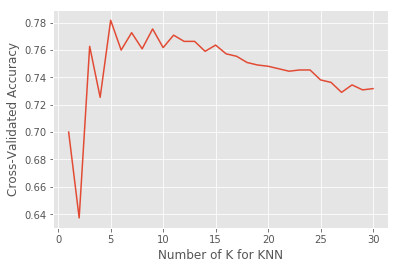

In [112]:
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)
# plot the results
plt.plot(k, grid_mean_scores)
plt.xlabel('Number of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

### The MLP Classifier Hyperparameter Tuning
**The MLP Classifier has the default of 1 hidden layer and 100 neurons.**
Typically this default setting is in line with research that suggests there are not many models that need more than 2 hidden layers to solve a problem.

**itertools** is imported for looping: functions creating iterators for efficient looping. More details here:  __[itertools](https://docs.python.org/3/library/itertools.html)__

**neurons = list(range(1, 101))** . This will train with 100, change how many neurons you want to train with here.
**neurons,repeat=1**  This is one hidden layer, change this for how many hidden layers you want to train with here.
**parameters** add whatever parameters you want ot train here. More details here:  __[MLP Parameters](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)__

**Note:**  The default solver ‘adam’ works pretty well on relatively large datasets (with thousands of training samples or more) in terms of both training time and validation score. For small datasets, however, ‘lbfgs’ can converge faster and perform better. An additional sgd exists but this did not appear as one on the beter solver for this data set.

*Unhash the parameters you wish to test or create your own, if selecting many different paramters these models can take hours to run, dependent on power of system*

[(1,) (2,) (3,) (4,) (5,) (6,) (7,) (8,) (9,)]
[ 0.59        0.55363636  0.46545455  0.62636364  0.5         0.50727273
  0.59181818  0.59090909  0.50818182]
0.626363636364
{'hidden_layer_sizes': (4,)}
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(4,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


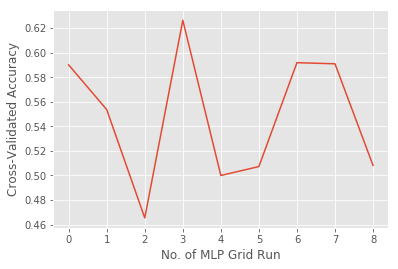

In [114]:
import itertools
from itertools import product
from sklearn.model_selection import GridSearchCV
from numpy import array
neurons = list(range(1, 10))
parameters = {'hidden_layer_sizes': [x for x in itertools.product(neurons,repeat=1)]} 
##parameters = {'hidden_layer_sizes': [x for x in itertools.product(hidlay,repeat=2)],'solver': ['lbfgs','adam']} 
#parameters = {'hidden_layer_sizes': [x for x in itertools.product(hidlay,repeat=2)]}
##parameters = {'hidden_layer_sizes': [x for x in itertools.product(hidlay,repeat=2)]} ##change repeat for hidden layers
##parameters = {'hidden_layer_sizes': [x for x in itertools.product(hidlay,repeat=1)],'solver': ['lbfgs','adam','sgd']} review different solvers

grid = GridSearchCV(estimator=MLPClassifier(), 
                    param_grid=parameters,
                    cv=kfold,
                    scoring='accuracy', return_train_score=False,n_jobs=-1)


grid.fit(X_train, y_train)

# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
# print the array of mean scores only

grid_mean_scores = grid.cv_results_['mean_test_score']
HL_range = grid.cv_results_['param_hidden_layer_sizes']
hl_range = array(HL_range)
print(hl_range)
print(grid_mean_scores)

li =[]
for i in range(len(grid_mean_scores)):
    li.append(i)

    
#print(grid.cv_results_)

plt.plot(li, grid_mean_scores)
plt.xlabel('No. of MLP Grid Run')
plt.ylabel('Cross-Validated Accuracy')
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

###  Comparing Machine Learning Models
The next section will use a BoxPlot to compare accuracy scores using the tuned paramters for the machine learning models.

**cv=kfold**  This is using the kfold=StratifiedKFold(n_splits=10), This will sort all the data and divide this into 10 k folds, the folds are made by ensuring the percentage of samples for each class are evenly distributed.  

KNN: Mean: 0.782428  Std:(0.096845)
NB: Mean: 0.982793  Std:(0.013082)
ANN: Mean: 0.682737  Std:(0.039257)


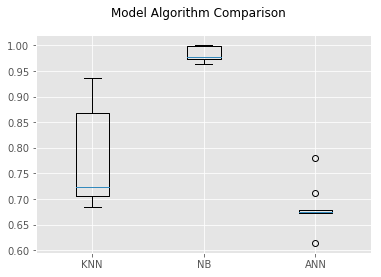

In [122]:
clfs = []
clfs.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
clfs.append(('NB', GaussianNB()))
clfs.append(('ANN', MLPClassifier(hidden_layer_sizes=(84,16), solver='lbfgs')))## change these parameters if required for the best values
kfold =StratifiedKFold(n_splits=10)
results = []
names = []
scoring = 'accuracy'
for name, clf in clfs:
    scores = cross_val_score(clf, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(scores)
    names.append(name)
    msg = "%s: Mean: %f  Std:(%f)" % (name, scores.mean(), scores.std())
    print(msg)


fig = plt.figure()
fig.suptitle('Model Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()



## Congratulations this is Section 2 Complete!